In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, preprocessing, tree, ensemble
from sklearn import model_selection

In [19]:
data_org = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

In [20]:
data_org.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
data_org.drop(columns = ['Name','Ticket'], inplace = True)
data_test.drop(columns = ['Name','Ticket'], inplace = True)

In [22]:
data_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S


In [23]:
data_org.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Text(0.5, 1.0, 'Cabin Distribution')

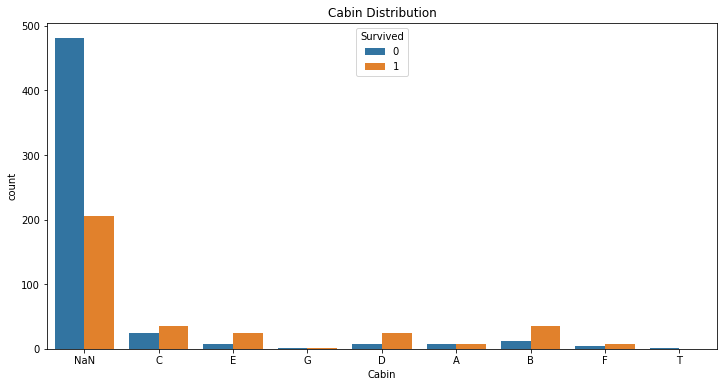

In [25]:
data_org['Cabin'] = data_org['Cabin'].apply(lambda x: str(x)[0] if not pd.isna(x) else 'NaN')
data_org.fillna('NaN')
plt.figure(figsize = (12,6))
sns.countplot(x = 'Cabin', hue = 'Survived', data = data_org)
plt.title("Cabin Distribution")

In [26]:
data_test['Cabin'] = data_test['Cabin'].apply(lambda x: str(x)[0] if not pd.isna(x) else 'NaN')
data_test.fillna('NaN')

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.05,NaN,S
414,1306,1,female,39.0,0,0,108.9,C,C
415,1307,3,male,38.5,0,0,7.25,NaN,S
416,1308,3,male,NaN,0,0,8.05,NaN,S


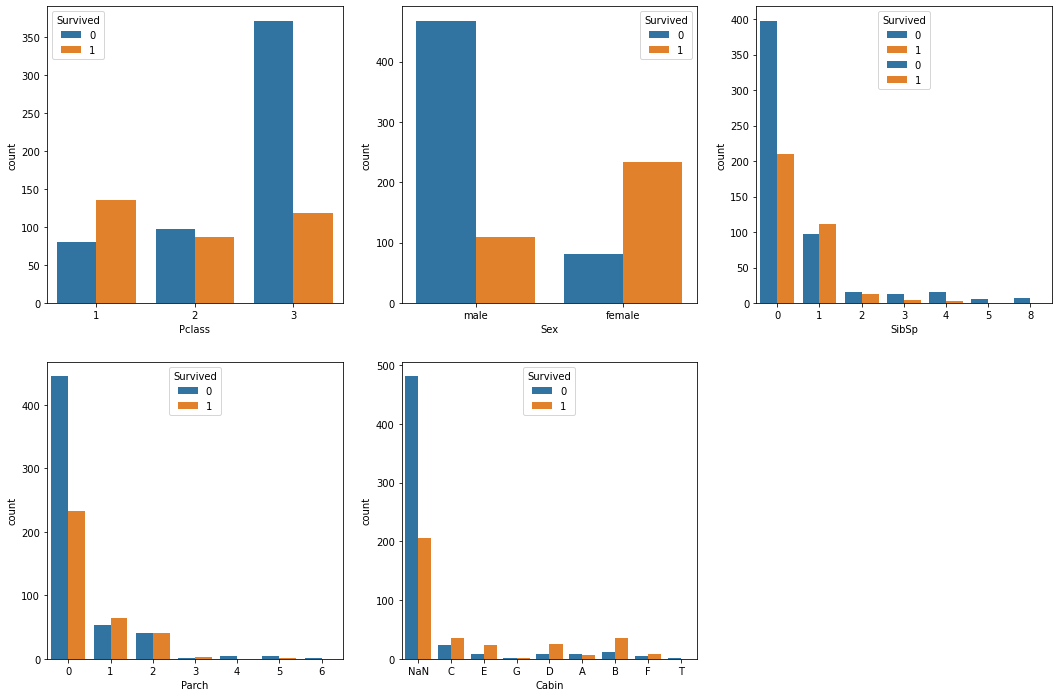

In [27]:
vars = ['Pclass','Sex','SibSp','Parch','Cabin','Embarked']
plt.figure(figsize = (18,12))
for i in range(2):
    for j in range(3):
        ind = i*2 + j
        plt.subplot(2,3,ind + 1)
        sns.countplot(x = vars[ind], hue = 'Survived', data = data_org)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

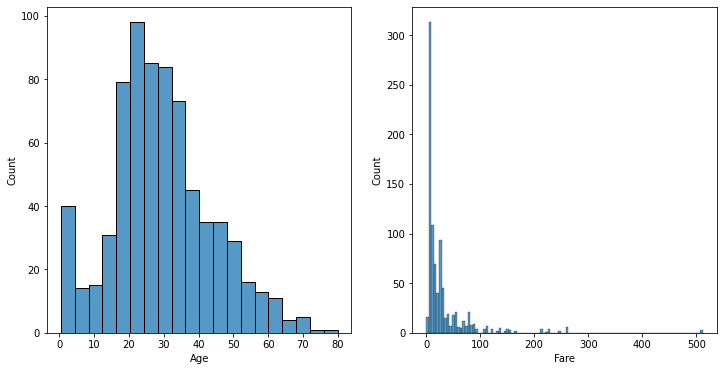

In [28]:
num_vars = ['Age','Fare']
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.histplot(x = 'Age', data = data_org)
plt.subplot(1,2,2)
sns.histplot(x = 'Fare', data = data_org)

<AxesSubplot:>

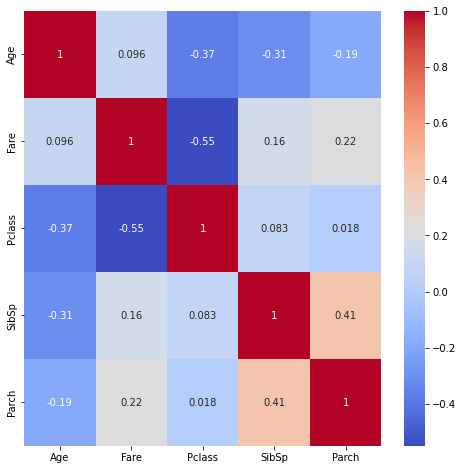

In [29]:
var = ['Age','Fare','Pclass','SibSp','Parch']
pearson_mat = data_org[var].corr()
plt.figure(figsize = (8,8))
sns.heatmap(pearson_mat,annot = True, cmap = "coolwarm")

# Feature Engineering

## 1. Missing Data 

In [30]:
data_org.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [31]:
data_test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Cabin           0
Embarked        0
dtype: int64

#### a/ Fare and Embarked
For Fare, we know that the fare is correlated to the Pclass of the ticket. Hence, to fill in the missing value for Fare, we find the median value of the Pclass which this person belongs to.
For Embarked, since the number of missing data is small and this variable does not appear to have correlation with other variables, we simply fill in with the most common values, i.e. mode of embarked

In [32]:
pclass_df = pd.DataFrame(data_org.groupby('Pclass')['Fare'].median()) 
pclass_df.reset_index(inplace = True)
for i in range(len(data_test)):
    if pd.isna(data_test.iloc[i,6]):
        data_test.iloc[i,6] = pclass_df[pclass_df['Pclass'] == data_test.iloc[i,1]]['Fare']

In [33]:
data_org['Embarked'].fillna(data_org['Embarked'].value_counts().sort_values(ascending = False).index[0],
                           inplace = True)

In [34]:
data_org['Embarked'].value_counts().sort_values(ascending = False).index[0]

'S'

#### b/ Age
Similarly, as Age is have the highest correlation with Pclass and SibSp, we will use the median values of a particular combination of Pclass and SibSp to fill in the Missing values.

In [35]:
age_df = pd.DataFrame(data_org.groupby(['Pclass','SibSp'])['Age'].median()).reset_index()
age_df.iloc[14,2] = age_df[age_df['Pclass'] == 3]['Age'].median()
age_df

,Pclass,SibSp,Age
0,1,0,37.00
1,1,1,38.00
2,1,2,44.00
3,1,3,23.00
4,2,0,30.00
5,2,1,29.00
6,2,2,23.50
7,2,3,30.00
8,3,0,26.00
9,3,1,25.00


In [36]:
for i in range(len(data_org)):
    if pd.isna(data_org.iloc[i,4]):
        data_org.iloc[i,4] = age_df[(age_df['Pclass'] == data_org.iloc[i,2]) & (age_df['SibSp'] == data_org.iloc[i,5])]
        
for i in range(len(data_test)):
    if pd.isna(data_test.iloc[i,3]):
        data_test.iloc[i,3] = age_df[(age_df['Pclass'] == data_test.iloc[i,1]) & (age_df['SibSp'] == data_test.iloc[i,4])]

## 2. New Features <br>
Create a new feature Family Size = Parch + SibSP + 1

Text(0.5, 1.0, 'Distribution of No of family members')

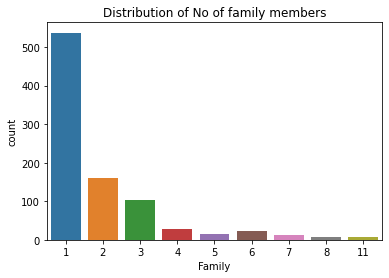

In [37]:
data_org['Family'] = data_org['Parch'] + data_org['SibSp'] + 1
data_test['Family'] = data_test['Parch'] + data_test['SibSp'] + 1
sns.countplot(x = 'Family', data = data_org)
plt.title("Distribution of No of family members")

In [38]:
data_org['Alone'] = data_org['Family'].apply(lambda x: 1 if x == 1 else 0)
data_test['Alone'] = data_test['Family'].apply(lambda x: 1 if x == 1 else 0)

## 3. Binarize skewed data

In [39]:
data_org['Parch'] = data_org['Parch'].apply(lambda x: str(x) if x < 2 else ">=2")
data_org['SibSp'] = data_org['SibSp'].apply(lambda x: str(x) if x < 2 else ">=2")
data_org['Family'] = data_org['Family'].apply(lambda x: str(x) if x < 4 else ">=4")
data_org['Cabin'] = data_org['Cabin'].apply(lambda x: "Cabin" if x != 'NaN' else "No Cabin")
data_test['Parch'] = data_test['Parch'].apply(lambda x: str(x) if x < 2 else ">=2")
data_test['SibSp'] = data_test['SibSp'].apply(lambda x: str(x) if x < 2 else ">=2")
data_test['Family'] = data_test['Family'].apply(lambda x: str(x) if x < 4 else ">=4")
data_test['Cabin'] = data_test['Cabin'].apply(lambda x: "Cabin" if x != 'NaN' else "No Cabin")

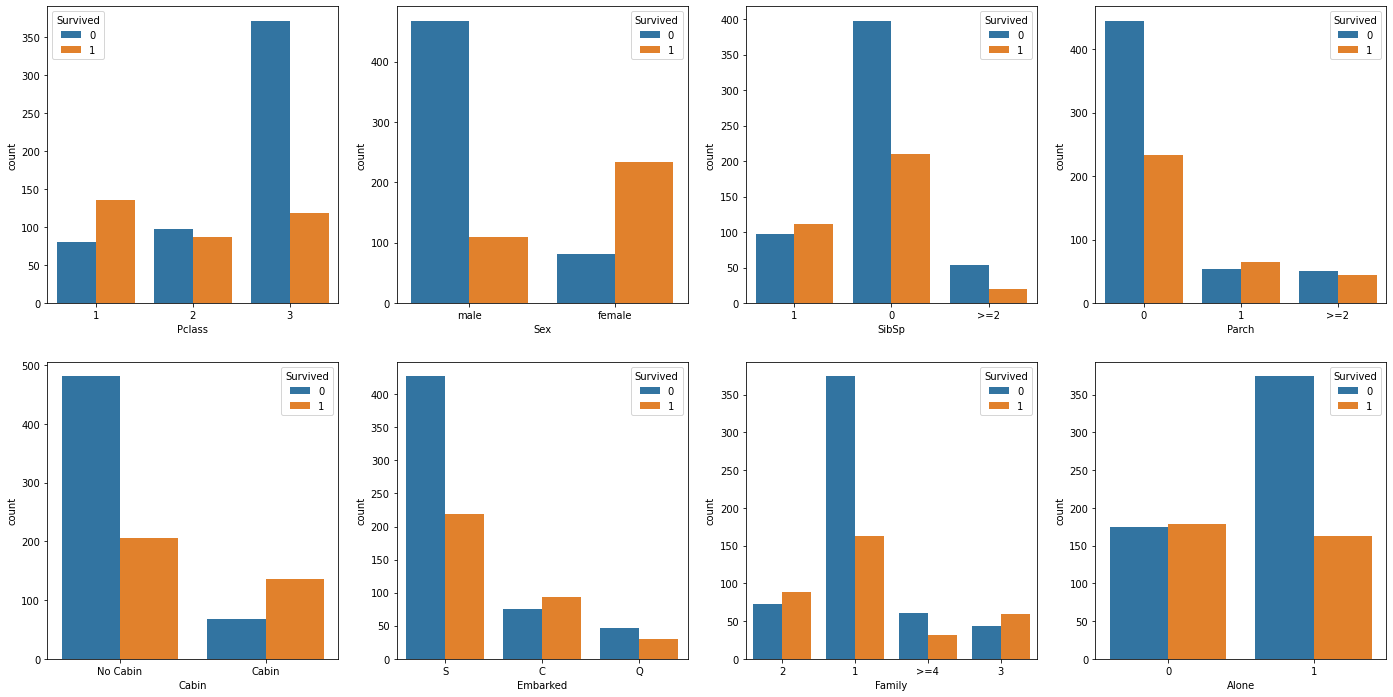

In [40]:
cat_vars = ['Pclass','Sex','SibSp','Parch','Cabin','Embarked','Family','Alone']
plt.figure(figsize = (24,12))
for i in range(2):
    for j in range(4):
        ind = i*4 + j
        plt.subplot(2,4,ind+1)
        sns.countplot(x = cat_vars[ind], hue = 'Survived', data = data_org)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

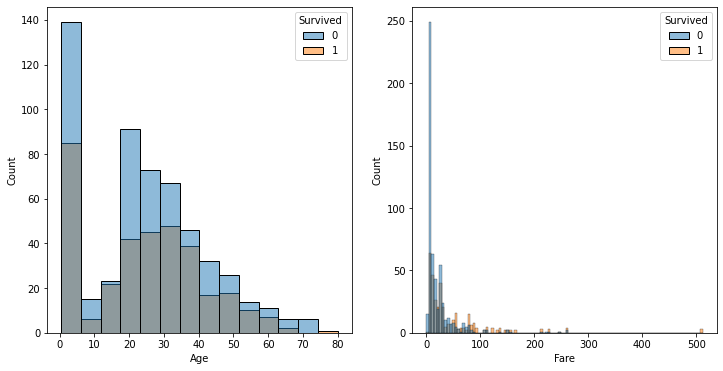

In [41]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.histplot(x = 'Age', hue = 'Survived', data = data_org)
plt.subplot(1,2,2)
sns.histplot(x = 'Fare', hue = 'Survived', data = data_org)

In [42]:
fare_labels = ["0-10","10-20","20-30","30-40","40-50","50-60",
               "60-70","70-80","80-90","90-100",">100"]
fare_bins = [0,10,20,30,40,50,60,70,80,90,100,data_org['Fare'].max()]

In [43]:
data_org['Fare'] = pd.cut(data_org['Fare'], bins = fare_bins, labels = fare_labels)
data_test['Fare'] = pd.cut(data_test['Fare'], bins = fare_bins, labels = fare_labels)

In [44]:
data_test.drop(columns = ['Parch','SibSp','Family'],
              inplace = True)

## 4. OneHotEncoding and StandardScaler

In [45]:
#cat_vars = ['Pclass','Sex','SibSp','Parch','Cabin','Embarked','Family','Alone','Fare']
cat_vars = ['Pclass','Sex','Cabin','Embarked','Alone','Fare']
num_vars = ['Age']

enc = preprocessing.OneHotEncoder(drop = 'first')
dummies_train = enc.fit_transform(data_org[cat_vars]).toarray()
scl = preprocessing.StandardScaler()
scl_cont_train = scl.fit_transform(data_org[num_vars])
X_train = np.concatenate([scl_cont_train,dummies_train], axis = 1)
y = data_org['Survived'].values
print(X_train.shape, y.shape)

(891, 19) (891,)


In [46]:
## Transform Test Data
dummies_test = enc.transform(data_test[cat_vars]).toarray()
scl_cont_test = scl.transform(data_test[num_vars])
X_test = np.concatenate([scl_cont_test,dummies_test], axis = 1)
print(X_test.shape)

(418, 19)


# Model Fitting

The training dataset is split into 

In [47]:
from sklearn import model_selection, metrics

x_train, x_test, y_train, y_test = model_selection.train_test_split(X_train,y,test_size = 0.3,
                                                                   random_state = 2022)

In [48]:
from sklearn.linear_model import LogisticRegression
lr_grid = {'C':[0.01, 0.1, 1, 10, 100, 1000]}

gcv_lr = model_selection.GridSearchCV(estimator = LogisticRegression(max_iter = 1000),
                                  param_grid = lr_grid,
                                  cv = 10)
gcv_lr.fit(x_train,y_train)
print(gcv_lr.best_params_)
lr = gcv_lr.best_estimator_
lr.fit(x_train,y_train)

{'C': 0.1}


LogisticRegression(C=0.1, max_iter=1000)

In [49]:
from sklearn import ensemble

In [50]:
bag_grid = {'max_samples':[0.2,0.4,0.6,0.8,1.0],
           'max_features':[0.2,0.4,0.6,0.8,1.0]}

gcv_bag = model_selection.GridSearchCV(estimator = ensemble.BaggingClassifier(n_estimators = 100,
                                                                             random_state = 2022,
                                                                             oob_score = True),
                                       param_grid = bag_grid,
                                      cv = 10)
gcv_bag.fit(x_train,y_train)
print('Best  hyperparameters:',gcv_bag.best_params_)
print('Score:',gcv_bag.best_score_)
bag = gcv_bag.best_estimator_
bag.fit(x_train,y_train)

Best  hyperparameters: {'max_features': 0.8, 'max_samples': 0.8}
Score: 0.8299539170506913


BaggingClassifier(max_features=0.8, max_samples=0.8, n_estimators=100,
                  oob_score=True, random_state=2022)

In [51]:
rf_grid = {'max_depth' : [4,5,6,7],
              'min_samples_leaf' : [1,2,3,4]}

gcv_rf = model_selection.GridSearchCV(estimator = ensemble.RandomForestClassifier(n_estimators = 100,
                                                                                 random_state = 2022,
                                                                                 oob_score = True),
                                  param_grid = rf_grid,
                                  cv = 10)

gcv_rf.fit(x_train, y_train)
print('Best  hyperparameters:',gcv_rf.best_params_)
print('Score:',gcv_rf.best_score_)

rf = gcv_rf.best_estimator_
rf.fit(x_train,y_train)

Best  hyperparameters: {'max_depth': 7, 'min_samples_leaf': 1}
Score: 0.8155913978494624


RandomForestClassifier(max_depth=7, oob_score=True, random_state=2022)

In [52]:
ada_grid = {'learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4]}
gcv_ada = model_selection.GridSearchCV(estimator = ensemble.AdaBoostClassifier(n_estimators = 100,
                                                                              random_state = 2022),
                                      param_grid = ada_grid,
                                      cv = 10)
gcv_ada.fit(x_train,y_train)
print('Best hyperparameters:',gcv_ada.best_params_)
print('Score:',gcv_ada.best_score_)

ada = gcv_ada.best_estimator_
ada.fit(x_train,y_train)

Best hyperparameters: {'learning_rate': 0.2}
Score: 0.7882488479262674


AdaBoostClassifier(learning_rate=0.2, n_estimators=100, random_state=2022)

In [53]:
gb_grid = {'learning_rate':[0.01,0.1,1],
          'subsample':[0.25,0.5,1],
          'max_depth':[2,3,4]}
gcv_gb = model_selection.GridSearchCV(estimator = ensemble.GradientBoostingClassifier(n_estimators = 100,
                                                                                      random_state = 2022),
                                      param_grid = gb_grid,
                                      cv = 10)
gcv_gb.fit(x_train,y_train)
print('Best hyperparameters:',gcv_ada.best_params_)
print('Score:',gcv_ada.best_score_)

gb = gcv_gb.best_estimator_
gb.fit(x_train,y_train)

Best hyperparameters: {'learning_rate': 0.2}
Score: 0.7882488479262674


GradientBoostingClassifier(random_state=2022, subsample=1)

In [54]:
models = [lr,bag,rf,ada,gb]
accuracy = [0] * 5
for i in range(5):
    models[i].fit(x_train,y_train)
    y_pred = models[i].predict(x_test)
    accuracy[i] = metrics.accuracy_score(y_test,y_pred)

In [59]:
accuracy

[0.8022388059701493,
 0.8097014925373134,
 0.8097014925373134,
 0.8134328358208955,
 0.7985074626865671]

Text(0.5, 1.0, 'Test Accuracy for models')

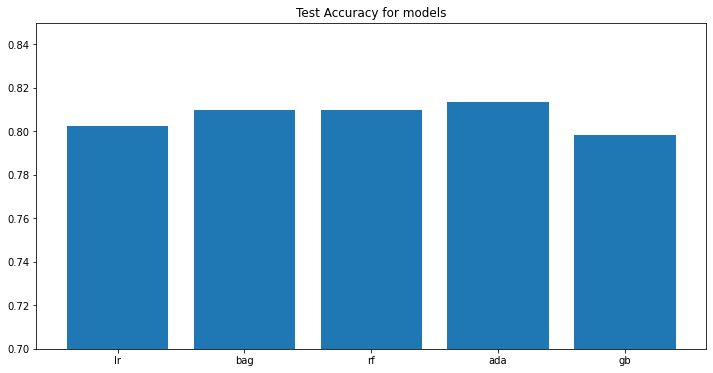

In [57]:
plt.figure(figsize = (12,6))
plt.bar(['lr','bag','rf','ada','gb'],accuracy)
plt.ylim(0.7,0.85)
plt.title("Test Accuracy for models")

In [56]:
model_labels = ['lr','bag','rf','ada','gb']
for i in range(5):
    final_pred = models[i].predict(X_test)
    output = pd.DataFrame({'PassengerId':data_test['PassengerId'],'Survived': final_pred})
    output.to_csv(model_labels[i] + 'submission.csv', index=False)